# PCA with sklearn - Intro tensorflow

### for python 2.7


In [213]:
import sklearn
from sklearn import decomposition,datasets
from sklearn.decomposition import PCA

import numpy as np

import seaborn
import matplotlib.pyplot as plt
import cv2

In [214]:
print("sklearn v: {0}\nseaborn v: {1} \nnumpy v: {2}".format(sklearn.__version__,seaborn.__version__,np.__version__))

sklearn v: 0.18.1
seaborn v: 0.7.1 
numpy v: 1.13.0


## Part 1: sklearn

### 1) data exploration (quick)

In [215]:
#### MNIST dataset
#### each row contains 64 values corresponding to 64 pixels "unrolled"
#### the image shape is 8*8

In [216]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [217]:
sample_image=digits.images[0]

#### Plot the first element of the dataset

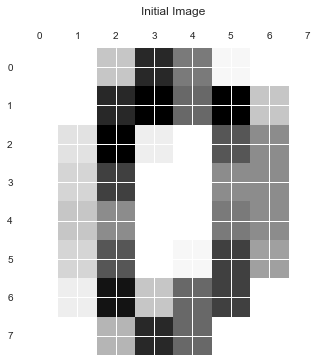

In [218]:
plt.matshow(sample_image)
plt.title("Initial Image\n")

plt.show() 

In [219]:
##Let's check the size of the image

In [220]:
print(sample_image.shape)

(8, 8)


In [221]:
X_mnist= digits.data

### 2) PCA

#### a) the digits (MNIST) dataset

##### Let's reduce the dimensionality to 5:

In [222]:
n_components = 5

In [223]:
pca = PCA(n_components)
X_mnist_reduced = pca.fit_transform(X_mnist)

In [224]:
print(X_mnist_reduced.shape)

(1797, 5)


##### Let's reconstruct the image_dataset:

In [225]:
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)

In [226]:
X_mnist_recovered.shape

(1797, 64)

##### Let's draw the recovered image corresponding to the sample image:

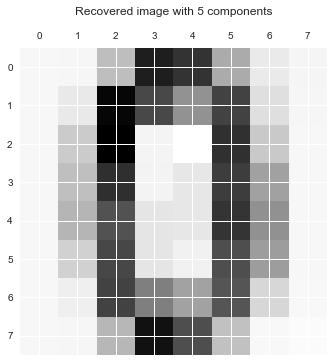

In [227]:
recovered_im=np.array(X_mnist_recovered[0]).reshape(sample_image.shape)
plt.matshow(recovered_im)
plt.title("Recovered image with {0} components\n".format(n_components))
plt.show()

#### b) Image from Youtube (American Dad)

##### Let's load the image as grayscale

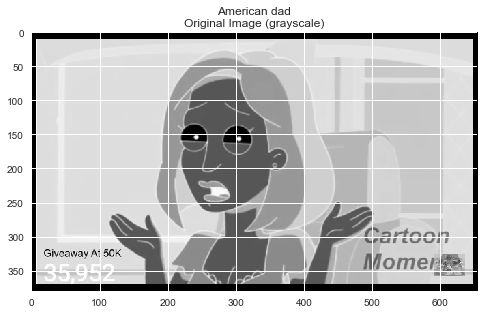

In [228]:
im=cv2.imread("/Users/assansanogo/Downloads/try_img.png",0)
plt.imshow(im)
plt.title("American dad\nOriginal Image (grayscale)")
plt.show()

In [229]:
print(im.shape)

(380, 655)


##### We will run PCA with various number of components (0 to 100)

In [230]:
X=[]
Y=[]
for i in range(1,100,1):
    n_components = i
    X.append(n_components)
    
    pca = PCA(n_components)
    im_reduced = pca.fit_transform(im)
    Y.append(sum(pca.explained_variance_ratio_))

##### Let's plot variance and components number

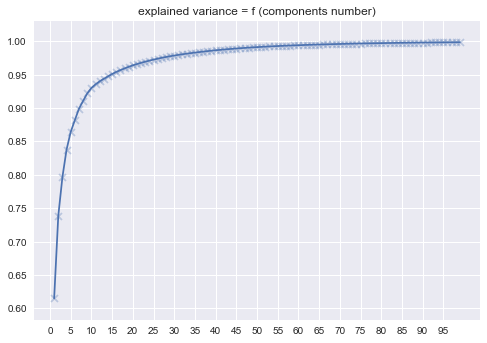

In [231]:
plt.scatter(X,Y, marker = 'x',alpha=0.3)
plt.plot(X,Y)
plt.title("explained variance = f (components number)")
plt.xticks(np.arange(0,100,5))
plt.show()

##### Let's even put some interactivity with Plotly API :)

In [232]:
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='AssanSanogo', api_key='vCYO3IAT0bz37AAvE0Ca')

In [233]:
trace1 = go.Scatter(
    x=X,
    y=Y,
    mode='markers',
     marker=dict(
        color='rgba(209, 72, 54, 0.5)',
        size=5,        
    )
)

trace2 = go.Scatter(
    x=X,
    y=Y,
    mode='lines',
     marker=dict(
        color='rgba(209, 72, 54, 1)',
        size=5,        
    )
)
data=[trace1,trace2]

layout = go.Layout(
    plot_bgcolor= "rgba(87, 237, 207, 0.2)",
    title='variance explained = f(n_components)',
    xaxis=dict(
        title='n_components',
        titlefont=dict(
            family='Verdana',
            size=10,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='variance explained',
        titlefont=dict(
            family='Verdana',
            size=10,
            color='#7f7f7f'
        )
    )
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styling-names')

##### Let's make a pca with 15 elements: since it retains >90% of variance

In [234]:
n_components = 25
pca = PCA(n_components)
im_reduced = pca.fit_transform(im)

##### Let 's recover the image : does the reduced information still captures picture details?

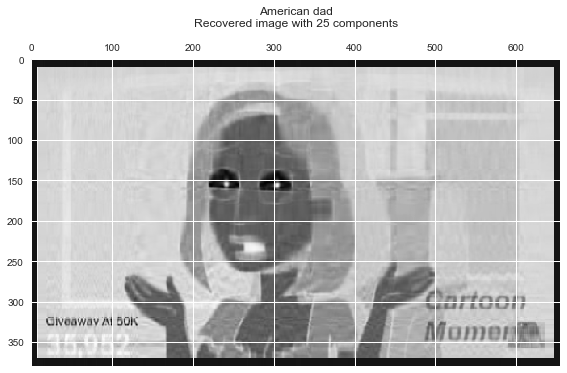

In [235]:
recovered_im = pca.inverse_transform(im_reduced)
recovered_im=np.array(recovered_im).reshape(im.shape)
plt.matshow(recovered_im)
plt.title("American dad\nRecovered image with {0} components\n".format(n_components))
plt.show()

## Part 2: Tensorflow

### 1) Introduction

#### imports

In [236]:
import tensorflow as tf

#### Generalities

###### addition:( dirty version)

In [237]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0, dtype=tf.float32)
print(node1, node2)

(<tf.Tensor 'Const_31:0' shape=() dtype=float32>, <tf.Tensor 'Const_32:0' shape=() dtype=float32>)


In [239]:
sess = tf.Session()

In [240]:

print(sess.run([node1, node2]))

[3.0, 4.0]


In [241]:
node3 = tf.add(node1, -node2)


In [242]:
print(sess.run(node3))

-1.0


###### addition:(clean version)

In [243]:
#the usage of with allows to write cleaner code
with tf.Session() as sess:
    node1 = tf.constant(3.0, dtype=tf.float32)
    node2 = tf.constant(4.0, dtype=tf.float32)
    node1.eval()
    node3 = tf.add(node1, -node2)
    res = node3.eval()
    print(res)

-1.0


###### Create x1 and x2 variables

In [244]:
x1 = tf.Variable(4.0,name="x")
x2 = tf.Variable(3.0,name="z")

In [245]:
y=x1*x2- x1/x2

In [246]:
sess=tf.Session()

    # Initialize the 2 variables all at once

In [247]:
init = tf.global_variables_initializer()
sess.run(init)

    # Initialize the 2 variables after each other

In [248]:
sess.run(x1.initializer)
sess.run(x2.initializer)

In [249]:
# Run the calculation

In [250]:
result=sess.run(y)

In [251]:
# Print the result

In [252]:
print(result)

10.6667


###### Calculations with x1 and x2 variables

    # Simple addition

In [253]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [254]:
adder_node=a+b

In [255]:
print(sess.run(adder_node, {a: 1, b: [20, 5]}))

[ 21.   6.]


In [256]:
print(sess.run(adder_node, {a: [1,2], b: [20, 5]}))

[ 21.   7.]


    # Addition+Multiplication

In [257]:
add_triple=adder_node*3

In [258]:
print(sess.run(add_triple, {a: 1, b: [20, 5]}))

[ 63.  18.]


### 2) Linear Regression

#### a) Generalities

##### Variables

In [259]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

##### Place_holder (input data that must be modelled)

In [260]:
x = tf.placeholder(tf.float32)
linear_model = W * x + b

##### Initialize variables

In [261]:
init = tf.global_variables_initializer()
sess.run(init)

##### Calculate: W * x + b

In [262]:
print(sess.run(linear_model, {x:[1,2,3,4]}))

[ 0.          0.30000001  0.60000002  0.90000004]


##### Calculate: ( y - W * x + b )^2

In [263]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)


##### Calculate:   1/len(x) * Sum( y - W * x + b )^2

In [264]:
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

23.66


#### b) Linear regression - optimize the weights and bias 

##### Model parameters

In [265]:
import numpy as np
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)


##### Model input and output

In [266]:
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)


##### Loss

In [267]:
# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares


##### Optimizer

In [268]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)


##### Training data

In [269]:
# training data
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]


##### Training loop

In [270]:
# training loop
# initialize the variables W,b

init = tf.global_variables_initializer()
# start the session
sess = tf.Session()

# reset values to pre-initialized values 
sess.run(init) 

#will calculate the optimization of the loss function 1000 times
for i in range(1000):
    sess.run(train, {x:x_train, y:y_train})



##### Evaluate accuracy

In [271]:
# evaluate training accuracy:
# it will calculate W,b : variables
# and evaluate the loss function
# based on the place_holders x and y


curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x:x_train, y:y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


### 3) Deep Convoluted Neural Network:

#### a) Introduction

In [272]:
from tensorflow.examples.tutorials.mnist import input_data

In [273]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [274]:
sample_image=mnist.train.images[0]

In [275]:
### The image has been unrolled into a vector of length 784

In [276]:
sample_image.shape

(784,)

In [277]:
### The original image as a shape of 28*28,
### we reshape then the "unrolled" image back to what it was

In [278]:
def plot_mnist(i=0):
    sample_image=mnist.train.images[i]
    im_reshaped=np.array(sample_image).reshape(28,28)
    plt.matshow(im_reshaped)
    plt.title( "the label is: {0}\n".format((mnist.train.labels[i]).tolist().index(1.)))
    plt.show()

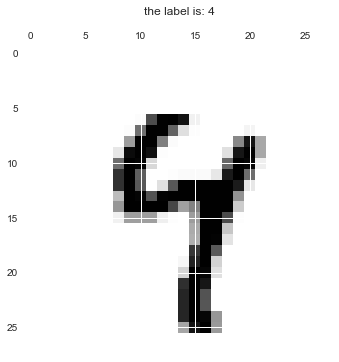

In [279]:
plot_mnist(2)

In [280]:
# the MNIST dataset is a tensor of shape 55000*784

In [281]:
mnist.train.images.shape

(55000, 784)

#### b) Regression with tensorflow applied to MNIST

In [282]:
x = tf.placeholder(tf.float32, [None, 784])

In [283]:
W= tf.Variable(tf.zeros([784,10]))

In [284]:
b= tf.Variable(tf.zeros([10]))

In [285]:
y = tf.matmul(x,W)+b

In [286]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [287]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [288]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [289]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for _ in range(10):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    accuracy_train=sess.run(accuracy, feed_dict={x: mnist.train.images,y_: mnist.train.labels})
    accuracy_test=sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels})
    
    print("the accuracy on training data is: {0}".format(accuracy_train))
    print("the accuracy on test data is: {0}".format(accuracy_test))
 
    

the accuracy on training data is: 0.772018194199
the accuracy on test data is: 0.783800005913


#### c) DNN

###### let's define functions:

In [290]:
def weight_variable(input_shape):
    initial = tf.truncated_normal(input_shape, stddev=0.1)
    return tf.Variable(initial)

In [291]:
def bias_variable(input_shape):
    initial = tf.constant(0.1, shape=input_shape)
    return tf.Variable(initial)

In [292]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')



In [293]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [294]:
def max_pool_nxn(x,n):
    return tf.nn.max_pool(x, ksize=[1, n, n, 1],
                        strides=[1, n, n, 1], padding='SAME')

###### let's build our NN:

In [295]:
#input layer

In [296]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [297]:
## Layer 1: first layer of convolution + reLu + max pool

![Image](http://inspirehep.net/record/1252539/files/CNN.png)

In [298]:
W_conv1 = weight_variable([5, 5, 1, 16])
b_conv1 = bias_variable([16])

In [299]:
##reLu output

![Image](https://imiloainf.files.wordpress.com/2013/11/activation_funcs1.png)

In [300]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

In [301]:
h_conv1

<tf.Tensor 'Relu_6:0' shape=(?, 28, 28, 16) dtype=float32>

In [302]:
## max pooling

In [303]:
h_pool1 = max_pool_2x2(h_conv1)

In [304]:
h_pool1

<tf.Tensor 'MaxPool_4:0' shape=(?, 14, 14, 16) dtype=float32>

In [305]:
#Layer 2:  A second layer of convolution + reLu + max pool

![Image](http://inspirehep.net/record/1252539/files/CNN.png)

In [307]:
W_conv2 = weight_variable([5, 5, 16, 32])
b_conv2 = bias_variable([32])

In [308]:
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

In [309]:
h_conv2

<tf.Tensor 'Relu_7:0' shape=(?, 14, 14, 32) dtype=float32>

In [310]:
h_pool2 = max_pool_2x2(h_conv2)

In [311]:
h_pool2

<tf.Tensor 'MaxPool_5:0' shape=(?, 7, 7, 32) dtype=float32>

In [312]:
#Layer 3:  third layer = fully connected layer

![image](https://qph.ec.quoracdn.net/main-qimg-05c1b921fbcb9d1278cac113190e880d-c)

In [313]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*32])

In [314]:
W_fc1 = weight_variable([7 * 7 * 32, 512])

In [315]:
b_fc1 = bias_variable([512])

In [316]:
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [317]:
#Layer 4: dropouts

![image](https://i.stack.imgur.com/SbXq1.jpg)

In [318]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [319]:
#Output Layer

In [320]:
W_fc2 = weight_variable([512, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [321]:
#Training

In [322]:
# after 9800 steps : accuracy ~0.988

In [210]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
            x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

        print('test accuracy %g' % accuracy.eval(feed_dict={
          x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.04
test accuracy 0.1373
test accuracy 0.1471
test accuracy 0.1507
test accuracy 0.153
test accuracy 0.15
test accuracy 0.1466
test accuracy 0.1482
test accuracy 0.1525
test accuracy 0.1603
test accuracy 0.1693
test accuracy 0.175
test accuracy 0.1847
test accuracy 0.2047
test accuracy 0.2166
test accuracy 0.2207
test accuracy 0.2187
test accuracy 0.2231
test accuracy 0.2285
test accuracy 0.2425
test accuracy 0.2712
test accuracy 0.3013
test accuracy 0.3328
test accuracy 0.3703
test accuracy 0.3975
test accuracy 0.4193
test accuracy 0.4247
test accuracy 0.4182
test accuracy 0.4109
test accuracy 0.4051
test accuracy 0.4071
test accuracy 0.4098
test accuracy 0.4201
test accuracy 0.4342
test accuracy 0.4446
test accuracy 0.4586
test accuracy 0.4724
test accuracy 0.485
test accuracy 0.4923
test accuracy 0.5043
test accuracy 0.5161
test accuracy 0.5245
test accuracy 0.5295
test accuracy 0.5344
test accuracy 0.54
test accuracy 0.5414
test accuracy 0.5463
test accur

test accuracy 0.9113
test accuracy 0.9107
test accuracy 0.9105
test accuracy 0.91
test accuracy 0.9094
test accuracy 0.9099
test accuracy 0.91
test accuracy 0.9107
test accuracy 0.911
test accuracy 0.9109
test accuracy 0.9106
test accuracy 0.9122
test accuracy 0.9138
step 400, training accuracy 0.84
test accuracy 0.915
test accuracy 0.9162
test accuracy 0.9172
test accuracy 0.917
test accuracy 0.9174
test accuracy 0.9183
test accuracy 0.9173
test accuracy 0.917
test accuracy 0.9164
test accuracy 0.9162
test accuracy 0.9163
test accuracy 0.916
test accuracy 0.9164
test accuracy 0.9158
test accuracy 0.916
test accuracy 0.9159
test accuracy 0.9158
test accuracy 0.9159
test accuracy 0.9156
test accuracy 0.915
test accuracy 0.9146
test accuracy 0.914
test accuracy 0.9139
test accuracy 0.9146
test accuracy 0.9142
test accuracy 0.9137
test accuracy 0.9142
test accuracy 0.9132
test accuracy 0.9125
test accuracy 0.9129
test accuracy 0.9141
test accuracy 0.9134
test accuracy 0.9129
test accuracy

test accuracy 0.9462
test accuracy 0.9457
test accuracy 0.947
test accuracy 0.9469
test accuracy 0.9468
test accuracy 0.9471
test accuracy 0.9464
test accuracy 0.9457
test accuracy 0.9451
test accuracy 0.9451
test accuracy 0.9451
test accuracy 0.9453
test accuracy 0.9448
test accuracy 0.9458
test accuracy 0.9457
test accuracy 0.9462
test accuracy 0.9468
test accuracy 0.9466
test accuracy 0.9471
test accuracy 0.9476
test accuracy 0.9478
test accuracy 0.9474
test accuracy 0.9486
test accuracy 0.9481
test accuracy 0.9489
test accuracy 0.9489
step 800, training accuracy 0.92
test accuracy 0.9494
test accuracy 0.9487
test accuracy 0.9481
test accuracy 0.9475
test accuracy 0.9472
test accuracy 0.9459
test accuracy 0.9461
test accuracy 0.9444
test accuracy 0.9437
test accuracy 0.9435
test accuracy 0.9438
test accuracy 0.9443
test accuracy 0.9432
test accuracy 0.944
test accuracy 0.9444
test accuracy 0.945
test accuracy 0.9456
test accuracy 0.9458
test accuracy 0.9457
test accuracy 0.9456
test

test accuracy 0.9541
test accuracy 0.9536
test accuracy 0.9528
test accuracy 0.9526
test accuracy 0.9521
test accuracy 0.9521
test accuracy 0.9525
test accuracy 0.9536
test accuracy 0.9542
test accuracy 0.9549
test accuracy 0.956
test accuracy 0.9565
test accuracy 0.9571
test accuracy 0.9569
test accuracy 0.9567
test accuracy 0.9568
test accuracy 0.957
test accuracy 0.9565
test accuracy 0.9559
test accuracy 0.956
test accuracy 0.9563
test accuracy 0.9566
test accuracy 0.9571
test accuracy 0.9574
test accuracy 0.9576
test accuracy 0.9583
test accuracy 0.9581
test accuracy 0.9583
test accuracy 0.9582
test accuracy 0.9583
test accuracy 0.9578
test accuracy 0.9579
test accuracy 0.958
test accuracy 0.9582
test accuracy 0.9583
test accuracy 0.9582
test accuracy 0.9587
test accuracy 0.9587
test accuracy 0.9586
step 1200, training accuracy 0.98
test accuracy 0.9584
test accuracy 0.958
test accuracy 0.9581
test accuracy 0.9577
test accuracy 0.9583
test accuracy 0.9583
test accuracy 0.9579
test 

test accuracy 0.9638
test accuracy 0.9637
test accuracy 0.9638
test accuracy 0.9636
test accuracy 0.9638
test accuracy 0.964
test accuracy 0.9639
test accuracy 0.9638
test accuracy 0.9638
test accuracy 0.9639
test accuracy 0.9636
test accuracy 0.9638
test accuracy 0.9639
test accuracy 0.9632
test accuracy 0.9628
test accuracy 0.9626
test accuracy 0.9627
test accuracy 0.9625
test accuracy 0.9629
test accuracy 0.9626
test accuracy 0.9629
test accuracy 0.9632
test accuracy 0.9633
test accuracy 0.9632
test accuracy 0.9639
test accuracy 0.9646
test accuracy 0.9648
test accuracy 0.9645
test accuracy 0.9632
test accuracy 0.9632
test accuracy 0.9633
test accuracy 0.9634
test accuracy 0.9633
test accuracy 0.9631
test accuracy 0.9634
test accuracy 0.9634
test accuracy 0.9636
test accuracy 0.9634
test accuracy 0.9635
test accuracy 0.9634
test accuracy 0.9633
test accuracy 0.9641
test accuracy 0.9639
test accuracy 0.9637
test accuracy 0.9639
test accuracy 0.9635
test accuracy 0.9635
test accuracy 

test accuracy 0.9674
test accuracy 0.9672
test accuracy 0.9673
test accuracy 0.9668
test accuracy 0.9671
test accuracy 0.9671
test accuracy 0.9676
test accuracy 0.9675
test accuracy 0.9678
test accuracy 0.968
test accuracy 0.968
test accuracy 0.9682
test accuracy 0.9685
test accuracy 0.9685
test accuracy 0.9683
test accuracy 0.9683
test accuracy 0.968
test accuracy 0.9675
test accuracy 0.9673
test accuracy 0.9676
test accuracy 0.9674
test accuracy 0.967
test accuracy 0.9673
test accuracy 0.9677
test accuracy 0.9684
test accuracy 0.9682
test accuracy 0.968
test accuracy 0.9684
test accuracy 0.9682
test accuracy 0.9687
test accuracy 0.9685
test accuracy 0.9688
test accuracy 0.969
test accuracy 0.969
test accuracy 0.9691
test accuracy 0.9694
test accuracy 0.9692
test accuracy 0.969
test accuracy 0.9689
test accuracy 0.9688
test accuracy 0.969
test accuracy 0.9688
test accuracy 0.9686
test accuracy 0.9683
test accuracy 0.9682
test accuracy 0.9681
test accuracy 0.9686
test accuracy 0.9688
t

test accuracy 0.9717
test accuracy 0.9714
test accuracy 0.9713
test accuracy 0.972
test accuracy 0.9721
test accuracy 0.9727
test accuracy 0.9728
test accuracy 0.9726
test accuracy 0.9721
test accuracy 0.972
test accuracy 0.9719
test accuracy 0.9716
test accuracy 0.9713
test accuracy 0.9708
test accuracy 0.9714
test accuracy 0.9714
test accuracy 0.9712
test accuracy 0.9712
test accuracy 0.9713
test accuracy 0.9711
test accuracy 0.9712
test accuracy 0.9712
test accuracy 0.9712
test accuracy 0.9713
test accuracy 0.9716
test accuracy 0.9718
test accuracy 0.9716
test accuracy 0.9718
test accuracy 0.9718
test accuracy 0.9721
test accuracy 0.9716
test accuracy 0.9713
test accuracy 0.9713
test accuracy 0.971
test accuracy 0.9705
test accuracy 0.9701
test accuracy 0.97
test accuracy 0.9703
test accuracy 0.9704
test accuracy 0.9707
test accuracy 0.9711
test accuracy 0.971
test accuracy 0.9703
test accuracy 0.9704
test accuracy 0.9702
test accuracy 0.9701
test accuracy 0.9701
test accuracy 0.969

test accuracy 0.9739
test accuracy 0.9741
test accuracy 0.9742
test accuracy 0.9744
test accuracy 0.9744
test accuracy 0.9746
test accuracy 0.9751
test accuracy 0.9753
test accuracy 0.9753
test accuracy 0.9755
test accuracy 0.9756
test accuracy 0.9755
test accuracy 0.9757
test accuracy 0.9758
test accuracy 0.9759
test accuracy 0.976
test accuracy 0.9759
test accuracy 0.9759
test accuracy 0.976
test accuracy 0.9759
test accuracy 0.9758
test accuracy 0.9757
test accuracy 0.9755
test accuracy 0.9756
test accuracy 0.9757
test accuracy 0.9755
test accuracy 0.9753
test accuracy 0.9751
test accuracy 0.9754
test accuracy 0.9753
test accuracy 0.9752
test accuracy 0.9753
test accuracy 0.9752
test accuracy 0.9752
test accuracy 0.9753
test accuracy 0.9752
test accuracy 0.9758
test accuracy 0.9759
test accuracy 0.9754
test accuracy 0.9753
test accuracy 0.9756
test accuracy 0.9754
test accuracy 0.9752
test accuracy 0.9752
test accuracy 0.9749
test accuracy 0.9748
test accuracy 0.9751
test accuracy 0

test accuracy 0.9762
test accuracy 0.976
test accuracy 0.9757
test accuracy 0.9762
test accuracy 0.9765
test accuracy 0.9764
step 3100, training accuracy 0.96
test accuracy 0.9771
test accuracy 0.9775
test accuracy 0.9773
test accuracy 0.9773
test accuracy 0.9775
test accuracy 0.9774
test accuracy 0.9772
test accuracy 0.977
test accuracy 0.977
test accuracy 0.9766
test accuracy 0.9765
test accuracy 0.9767
test accuracy 0.9765
test accuracy 0.9763
test accuracy 0.9766
test accuracy 0.9768
test accuracy 0.9765
test accuracy 0.9767
test accuracy 0.9771
test accuracy 0.9769
test accuracy 0.9766
test accuracy 0.9766
test accuracy 0.9769
test accuracy 0.9766
test accuracy 0.9766
test accuracy 0.9763
test accuracy 0.9762
test accuracy 0.9764
test accuracy 0.9764
test accuracy 0.9765
test accuracy 0.9765
test accuracy 0.9764
test accuracy 0.9761
test accuracy 0.9761
test accuracy 0.9763
test accuracy 0.9767
test accuracy 0.9768
test accuracy 0.9771
test accuracy 0.9772
test accuracy 0.9774
tes

test accuracy 0.9792
test accuracy 0.9792
test accuracy 0.9794
test accuracy 0.9794
test accuracy 0.9795
test accuracy 0.9795
test accuracy 0.9794
test accuracy 0.9793
test accuracy 0.9792
test accuracy 0.9793
test accuracy 0.9791
test accuracy 0.9791
test accuracy 0.9794
test accuracy 0.9791
test accuracy 0.9792
test accuracy 0.9791
test accuracy 0.9788
test accuracy 0.9788
test accuracy 0.9787
step 3500, training accuracy 0.98
test accuracy 0.9785
test accuracy 0.9786
test accuracy 0.9785
test accuracy 0.9785
test accuracy 0.9784
test accuracy 0.9784
test accuracy 0.9786
test accuracy 0.9787
test accuracy 0.9788
test accuracy 0.9789
test accuracy 0.9789
test accuracy 0.9791
test accuracy 0.9792
test accuracy 0.9794
test accuracy 0.9795
test accuracy 0.9793
test accuracy 0.979
test accuracy 0.9785
test accuracy 0.9785
test accuracy 0.9782
test accuracy 0.9777
test accuracy 0.9775
test accuracy 0.9769
test accuracy 0.9769
test accuracy 0.9765
test accuracy 0.9764
test accuracy 0.9764
t

test accuracy 0.9789
test accuracy 0.9789
test accuracy 0.9786
test accuracy 0.9792
test accuracy 0.9795
test accuracy 0.9794
test accuracy 0.9795
test accuracy 0.9795
test accuracy 0.9798
test accuracy 0.98
test accuracy 0.9799
test accuracy 0.9798
test accuracy 0.9798
test accuracy 0.9795
test accuracy 0.9793
test accuracy 0.9795
test accuracy 0.9794
test accuracy 0.9794
test accuracy 0.9792
test accuracy 0.9793
test accuracy 0.9799
test accuracy 0.9799
test accuracy 0.9797
test accuracy 0.9798
test accuracy 0.98
test accuracy 0.9803
test accuracy 0.9801
test accuracy 0.9801
test accuracy 0.9803
test accuracy 0.9803
test accuracy 0.9801
test accuracy 0.98
test accuracy 0.9801
step 3900, training accuracy 0.98
test accuracy 0.9801
test accuracy 0.9801
test accuracy 0.9802
test accuracy 0.9806
test accuracy 0.9803
test accuracy 0.98
test accuracy 0.9799
test accuracy 0.9799
test accuracy 0.9799
test accuracy 0.98
test accuracy 0.9806
test accuracy 0.9805
test accuracy 0.9801
test accur

test accuracy 0.9812
test accuracy 0.9811
test accuracy 0.9813
test accuracy 0.9808
test accuracy 0.9809
test accuracy 0.9808
test accuracy 0.9806
test accuracy 0.9805
test accuracy 0.9804
test accuracy 0.9803
test accuracy 0.9806
test accuracy 0.9805
test accuracy 0.9805
test accuracy 0.9807
test accuracy 0.9805
test accuracy 0.9805
test accuracy 0.9808
test accuracy 0.9807
test accuracy 0.9807
test accuracy 0.9809
test accuracy 0.9808
test accuracy 0.981
test accuracy 0.9811
test accuracy 0.9811
test accuracy 0.9812
test accuracy 0.9813
test accuracy 0.9812
test accuracy 0.9815
test accuracy 0.9818
test accuracy 0.9815
test accuracy 0.9818
test accuracy 0.9817
test accuracy 0.9815
test accuracy 0.9818
test accuracy 0.9818
test accuracy 0.9819
test accuracy 0.982
test accuracy 0.9821
test accuracy 0.982
test accuracy 0.9818
test accuracy 0.9817
test accuracy 0.9817
test accuracy 0.9817
test accuracy 0.9817
test accuracy 0.9815
test accuracy 0.9815
step 4300, training accuracy 1
test a

test accuracy 0.9818
test accuracy 0.9822
test accuracy 0.9819
test accuracy 0.982
test accuracy 0.9816
test accuracy 0.9817
test accuracy 0.9815
test accuracy 0.9814
test accuracy 0.9813
test accuracy 0.9815
test accuracy 0.9814
test accuracy 0.9821
test accuracy 0.9823
test accuracy 0.9828
test accuracy 0.9829
test accuracy 0.9825
test accuracy 0.9823
test accuracy 0.9824
test accuracy 0.9827
test accuracy 0.9831
test accuracy 0.9829
test accuracy 0.983
test accuracy 0.9826
test accuracy 0.9823
test accuracy 0.9823
test accuracy 0.9825
test accuracy 0.9822
test accuracy 0.982
test accuracy 0.9818
test accuracy 0.9816
test accuracy 0.9817
test accuracy 0.9817
test accuracy 0.9821
test accuracy 0.9816
test accuracy 0.9822
test accuracy 0.9822
test accuracy 0.9821
test accuracy 0.9823
test accuracy 0.9823
test accuracy 0.982
test accuracy 0.9824
test accuracy 0.9823
test accuracy 0.9824
test accuracy 0.9824
test accuracy 0.9823
test accuracy 0.9822
test accuracy 0.9822
test accuracy 0.9

test accuracy 0.9842
test accuracy 0.9842
test accuracy 0.9837
test accuracy 0.9835
test accuracy 0.9831
test accuracy 0.9826
test accuracy 0.9821
test accuracy 0.9822
test accuracy 0.9818
test accuracy 0.9815
test accuracy 0.9815
test accuracy 0.9817
test accuracy 0.9816
test accuracy 0.9821
test accuracy 0.9822
test accuracy 0.9827
test accuracy 0.9828
test accuracy 0.9833
test accuracy 0.9835
test accuracy 0.9838
test accuracy 0.984
test accuracy 0.9841
test accuracy 0.9842
test accuracy 0.984
test accuracy 0.9839
test accuracy 0.9837
test accuracy 0.9837
test accuracy 0.9837
test accuracy 0.9839
test accuracy 0.9837
test accuracy 0.9833
test accuracy 0.9835
test accuracy 0.9836
test accuracy 0.9838
test accuracy 0.984
test accuracy 0.9842
test accuracy 0.9842
test accuracy 0.9843
test accuracy 0.9842
test accuracy 0.9844
test accuracy 0.9843
test accuracy 0.984
test accuracy 0.9839
test accuracy 0.984
test accuracy 0.9843
test accuracy 0.9843
test accuracy 0.9839
test accuracy 0.98

test accuracy 0.9838
test accuracy 0.984
test accuracy 0.984
test accuracy 0.9841
test accuracy 0.9839
test accuracy 0.9836
test accuracy 0.9838
test accuracy 0.9838
test accuracy 0.9838
test accuracy 0.9833
test accuracy 0.9835
test accuracy 0.9836
test accuracy 0.9836
test accuracy 0.9836
test accuracy 0.9833
test accuracy 0.9837
test accuracy 0.9836
test accuracy 0.9833
test accuracy 0.983
test accuracy 0.983
test accuracy 0.983
test accuracy 0.9827
test accuracy 0.9829
test accuracy 0.9827
test accuracy 0.9831
test accuracy 0.9835
test accuracy 0.9837
test accuracy 0.9841
test accuracy 0.9845
test accuracy 0.9842
test accuracy 0.9843
test accuracy 0.9841
test accuracy 0.9838
test accuracy 0.9837
test accuracy 0.9831
test accuracy 0.9833
test accuracy 0.9832
test accuracy 0.9829
test accuracy 0.9827
test accuracy 0.9827
test accuracy 0.9823
test accuracy 0.9824
test accuracy 0.9825
test accuracy 0.9823
test accuracy 0.9828
test accuracy 0.9832
test accuracy 0.9837
test accuracy 0.98

test accuracy 0.9855
test accuracy 0.9855
test accuracy 0.9857
test accuracy 0.9858
test accuracy 0.9858
test accuracy 0.9853
test accuracy 0.9849
test accuracy 0.9849
test accuracy 0.9851
test accuracy 0.985
test accuracy 0.9854
test accuracy 0.9852
test accuracy 0.9857
test accuracy 0.9858
test accuracy 0.9857
test accuracy 0.9858
test accuracy 0.9859
test accuracy 0.9856
test accuracy 0.9858
test accuracy 0.9855
test accuracy 0.9854
test accuracy 0.9854
test accuracy 0.9856
test accuracy 0.9854
test accuracy 0.9855
test accuracy 0.9855
test accuracy 0.9854
test accuracy 0.9854
test accuracy 0.985
test accuracy 0.9849
test accuracy 0.9848
test accuracy 0.9849
test accuracy 0.9848
test accuracy 0.9851
test accuracy 0.985
test accuracy 0.9848
test accuracy 0.9851
test accuracy 0.9849
test accuracy 0.9847
test accuracy 0.9847
test accuracy 0.9845
test accuracy 0.9844
test accuracy 0.9844
test accuracy 0.9844
test accuracy 0.9845
test accuracy 0.9843
test accuracy 0.984
test accuracy 0.9

test accuracy 0.9855
test accuracy 0.9858
test accuracy 0.986
test accuracy 0.9859
test accuracy 0.9858
test accuracy 0.9861
test accuracy 0.9857
test accuracy 0.9855
test accuracy 0.9858
test accuracy 0.9858
test accuracy 0.9859
test accuracy 0.9857
step 6200, training accuracy 0.96
test accuracy 0.9857
test accuracy 0.986
test accuracy 0.9859
test accuracy 0.986
test accuracy 0.986
test accuracy 0.9862
test accuracy 0.9863
test accuracy 0.9864
test accuracy 0.9864
test accuracy 0.9864
test accuracy 0.9863
test accuracy 0.9859
test accuracy 0.9855
test accuracy 0.9853
test accuracy 0.9852
test accuracy 0.9855
test accuracy 0.9854
test accuracy 0.9853
test accuracy 0.9853
test accuracy 0.9854
test accuracy 0.9854
test accuracy 0.9858
test accuracy 0.9858
test accuracy 0.9859
test accuracy 0.9862
test accuracy 0.9862
test accuracy 0.9862
test accuracy 0.9865
test accuracy 0.9866
test accuracy 0.9864
test accuracy 0.9868
test accuracy 0.9869
test accuracy 0.9868
test accuracy 0.9864
test

test accuracy 0.9865
test accuracy 0.9866
test accuracy 0.987
test accuracy 0.987
test accuracy 0.987
test accuracy 0.9867
test accuracy 0.9867
test accuracy 0.9863
test accuracy 0.9862
test accuracy 0.9861
test accuracy 0.9861
test accuracy 0.9863
test accuracy 0.9864
test accuracy 0.9863
test accuracy 0.9861
test accuracy 0.9862
test accuracy 0.9863
test accuracy 0.9863
test accuracy 0.9866
test accuracy 0.9866
test accuracy 0.9866
test accuracy 0.9866
test accuracy 0.9868
test accuracy 0.9868
test accuracy 0.9867
test accuracy 0.9867
step 6600, training accuracy 1
test accuracy 0.9867
test accuracy 0.9866
test accuracy 0.9867
test accuracy 0.9866
test accuracy 0.9867
test accuracy 0.9866
test accuracy 0.9867
test accuracy 0.9866
test accuracy 0.9869
test accuracy 0.9863
test accuracy 0.9862
test accuracy 0.9862
test accuracy 0.9863
test accuracy 0.9863
test accuracy 0.9863
test accuracy 0.9863
test accuracy 0.9862
test accuracy 0.9861
test accuracy 0.986
test accuracy 0.9859
test ac

test accuracy 0.9869
test accuracy 0.9869
test accuracy 0.9871
test accuracy 0.987
test accuracy 0.987
test accuracy 0.9871
test accuracy 0.987
test accuracy 0.987
test accuracy 0.987
test accuracy 0.9868
test accuracy 0.9866
test accuracy 0.9867
test accuracy 0.9868
test accuracy 0.9868
test accuracy 0.9868
test accuracy 0.9868
test accuracy 0.9867
test accuracy 0.9869
test accuracy 0.9866
test accuracy 0.9865
test accuracy 0.9864
test accuracy 0.9864
test accuracy 0.9862
test accuracy 0.9863
test accuracy 0.9862
test accuracy 0.9861
test accuracy 0.9859
test accuracy 0.9859
test accuracy 0.986
test accuracy 0.9861
test accuracy 0.9861
test accuracy 0.9861
test accuracy 0.9862
test accuracy 0.9865
test accuracy 0.9866
test accuracy 0.9871
test accuracy 0.9871
test accuracy 0.9867
test accuracy 0.9868
test accuracy 0.9871
step 7000, training accuracy 1
test accuracy 0.9873
test accuracy 0.9869
test accuracy 0.9869
test accuracy 0.9868
test accuracy 0.9864
test accuracy 0.9862
test accu

test accuracy 0.9879
test accuracy 0.9875
test accuracy 0.9875
test accuracy 0.9874
test accuracy 0.9873
test accuracy 0.9872
test accuracy 0.9872
test accuracy 0.9872
test accuracy 0.9872
test accuracy 0.9874
test accuracy 0.9875
test accuracy 0.9873
test accuracy 0.9871
test accuracy 0.9873
test accuracy 0.9872
test accuracy 0.987
test accuracy 0.9867
test accuracy 0.9867
test accuracy 0.9869
test accuracy 0.9871
test accuracy 0.9873
test accuracy 0.9874
test accuracy 0.9874
test accuracy 0.9874
test accuracy 0.9874
test accuracy 0.9873
test accuracy 0.9871
test accuracy 0.9871
test accuracy 0.9873
test accuracy 0.9876
test accuracy 0.9875
test accuracy 0.9873
test accuracy 0.9872
test accuracy 0.987
test accuracy 0.9869
test accuracy 0.9868
test accuracy 0.987
test accuracy 0.9873
test accuracy 0.9871
test accuracy 0.9872
test accuracy 0.9871
test accuracy 0.9872
test accuracy 0.9873
test accuracy 0.9874
test accuracy 0.9868
test accuracy 0.9868
test accuracy 0.9868
test accuracy 0.

test accuracy 0.9889
test accuracy 0.9887
test accuracy 0.9885
test accuracy 0.9883
test accuracy 0.9883
test accuracy 0.9886
test accuracy 0.9887
test accuracy 0.9889
test accuracy 0.9889
test accuracy 0.9889
test accuracy 0.9888
test accuracy 0.9889
test accuracy 0.9889
test accuracy 0.9886
test accuracy 0.9885
test accuracy 0.9885
test accuracy 0.9886
test accuracy 0.9886
test accuracy 0.9887
test accuracy 0.9886
test accuracy 0.9885
test accuracy 0.9886
test accuracy 0.9884
test accuracy 0.9884
test accuracy 0.9883
test accuracy 0.9883
test accuracy 0.9884
test accuracy 0.9882
test accuracy 0.9882
test accuracy 0.9881
test accuracy 0.9881
test accuracy 0.9878
test accuracy 0.9878
test accuracy 0.9877
test accuracy 0.9878
test accuracy 0.988
test accuracy 0.988
test accuracy 0.9882
test accuracy 0.988
test accuracy 0.988
test accuracy 0.9879
test accuracy 0.988
test accuracy 0.988
test accuracy 0.988
test accuracy 0.9877
test accuracy 0.9879
test accuracy 0.9878
test accuracy 0.9878

test accuracy 0.9874
test accuracy 0.9874
test accuracy 0.9874
test accuracy 0.9875
test accuracy 0.9876
test accuracy 0.9883
test accuracy 0.9884
test accuracy 0.9885
test accuracy 0.9887
test accuracy 0.9885
test accuracy 0.9884
test accuracy 0.9883
test accuracy 0.9882
test accuracy 0.9882
test accuracy 0.988
test accuracy 0.9881
test accuracy 0.9883
test accuracy 0.988
test accuracy 0.9881
test accuracy 0.9876
test accuracy 0.9874
test accuracy 0.9877
test accuracy 0.9876
test accuracy 0.9872
test accuracy 0.9876
test accuracy 0.9881
test accuracy 0.9877
test accuracy 0.9877
test accuracy 0.9878
test accuracy 0.9881
test accuracy 0.9882
test accuracy 0.9881
test accuracy 0.9882
test accuracy 0.9881
test accuracy 0.988
test accuracy 0.9878
test accuracy 0.9879
test accuracy 0.9878
test accuracy 0.9878
test accuracy 0.9877
test accuracy 0.9876
test accuracy 0.9876
test accuracy 0.9879
test accuracy 0.9876
test accuracy 0.9876
test accuracy 0.9872
test accuracy 0.9871
test accuracy 0.

test accuracy 0.9874
test accuracy 0.987
test accuracy 0.9868
test accuracy 0.9867
test accuracy 0.9867
test accuracy 0.9867
test accuracy 0.9867
test accuracy 0.9868
test accuracy 0.987
test accuracy 0.9868
test accuracy 0.9871
test accuracy 0.9872
test accuracy 0.9875
test accuracy 0.9875
test accuracy 0.9877
test accuracy 0.9881
test accuracy 0.9878
test accuracy 0.9878
test accuracy 0.9879
test accuracy 0.9877
test accuracy 0.9876
test accuracy 0.9878
test accuracy 0.988
test accuracy 0.9879
test accuracy 0.9881
test accuracy 0.988
test accuracy 0.9879
test accuracy 0.9877
test accuracy 0.9882
test accuracy 0.9882
test accuracy 0.9885
test accuracy 0.9888
test accuracy 0.989
test accuracy 0.9893
test accuracy 0.989
test accuracy 0.9886
test accuracy 0.9879
test accuracy 0.9878
test accuracy 0.9877
test accuracy 0.9879
test accuracy 0.9879
test accuracy 0.9877
test accuracy 0.9877
test accuracy 0.9878
test accuracy 0.9876
test accuracy 0.9875
test accuracy 0.9875
test accuracy 0.987

test accuracy 0.9874
test accuracy 0.9877
test accuracy 0.9875
test accuracy 0.9876
test accuracy 0.9877
step 8900, training accuracy 0.98
test accuracy 0.9874
test accuracy 0.9874
test accuracy 0.9873
test accuracy 0.9876
test accuracy 0.9879
test accuracy 0.9881
test accuracy 0.9881
test accuracy 0.9882
test accuracy 0.9885
test accuracy 0.9884
test accuracy 0.9885
test accuracy 0.9886
test accuracy 0.9886
test accuracy 0.9885
test accuracy 0.9885
test accuracy 0.9887
test accuracy 0.9886
test accuracy 0.9884
test accuracy 0.9884
test accuracy 0.9884
test accuracy 0.9884
test accuracy 0.9882
test accuracy 0.9883
test accuracy 0.9882
test accuracy 0.9883
test accuracy 0.9883
test accuracy 0.9883
test accuracy 0.9881
test accuracy 0.988
test accuracy 0.9879
test accuracy 0.9878
test accuracy 0.9877
test accuracy 0.9878
test accuracy 0.9876
test accuracy 0.9875
test accuracy 0.9876
test accuracy 0.9875
test accuracy 0.9874
test accuracy 0.9875
test accuracy 0.9874
test accuracy 0.9878
t

test accuracy 0.9889
test accuracy 0.9886
test accuracy 0.9888
test accuracy 0.9889
test accuracy 0.9889
test accuracy 0.989
test accuracy 0.9891
test accuracy 0.9892
test accuracy 0.9892
test accuracy 0.9891
test accuracy 0.989
test accuracy 0.9891
test accuracy 0.9888
test accuracy 0.9889
test accuracy 0.9886
test accuracy 0.9887
test accuracy 0.9883
test accuracy 0.9884
test accuracy 0.9884
step 9300, training accuracy 0.98
test accuracy 0.9883
test accuracy 0.9884
test accuracy 0.9883
test accuracy 0.9883
test accuracy 0.9883
test accuracy 0.9883
test accuracy 0.9881
test accuracy 0.9879
test accuracy 0.9878
test accuracy 0.9878
test accuracy 0.9878
test accuracy 0.9879
test accuracy 0.988
test accuracy 0.9879
test accuracy 0.988
test accuracy 0.9875
test accuracy 0.9872
test accuracy 0.9874
test accuracy 0.9873
test accuracy 0.9875
test accuracy 0.9876
test accuracy 0.9877
test accuracy 0.9879
test accuracy 0.9878
test accuracy 0.9881
test accuracy 0.9885
test accuracy 0.9886
test

KeyboardInterrupt: 